In [209]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, k_means
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Reading csv file and looking for 5 first rows
PATH = 'C:/Users/Sebastian/Downloads/'
raw_data = pd.read_csv(PATH+'Events Raw Data.csv')
print('Data shape is: {} rows and {} columns'.format(raw_data.shape[0],raw_data.shape[1]))
raw_data.head()

Data shape is: 14783 rows and 19 columns


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [52]:
# Making copy of raw_Data and checking for NULL values
df = raw_data.copy()
df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [53]:
df[df['Social_Media'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Deleting the NULL from whole DataFrame and checking its shape
df.dropna(subset=['Social_Media'],inplace=True)
print('Data shape is: {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Data shape is: 14778 rows and 19 columns


In [56]:
# Checking if NULL values were deleted properly
df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [70]:
# Printing all the columns with their unique values (with if function)
for column in df.columns:
    unique_vals = np.unique(df[column])
    len_vals = len(unique_vals)
    if len_vals < 10:
        print('Feature {} has {} unique columns: {}\n'.format(column, len_vals, unique_vals))
    else:
        print('Feature {} has {} unique columns\n'.format(column, len_vals))
    

Feature CUSTOMER has 14778 unique columns

Feature Age has 9 unique columns: ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']

Feature Gender has 2 unique columns: ['Female' 'Male']

Feature Postcode has 14674 unique columns

Feature District has 225 unique columns

Feature Constituency has 358 unique columns

Feature latitude has 13242 unique columns

Feature longitude has 13262 unique columns

Feature Current_Status has 8 unique columns: ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']

Feature Total_Household_Income has 8 unique columns: ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']

Feature How often you attend Entertaining events in a year? has 5 unique columns: ['1 Times a Year' '2 Times a Year' '3 Times a Year' '4 Times a Year'
 '5

In [85]:
# Listing all the columns from DataFrame
df.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

In [86]:
# Choosing only relevant columns for countplots
features = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

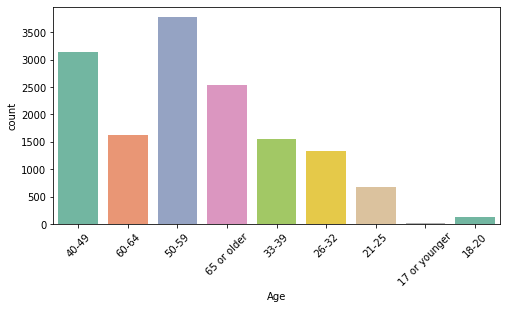

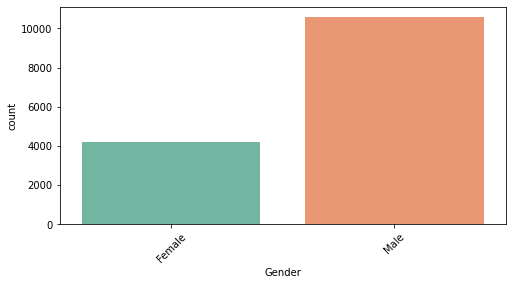

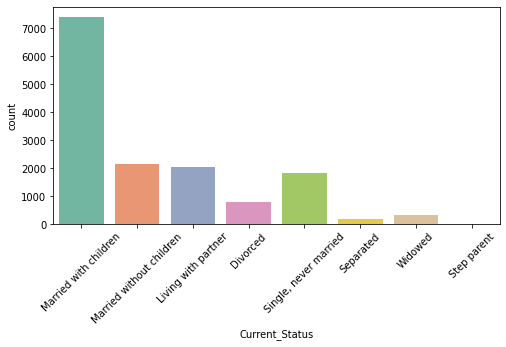

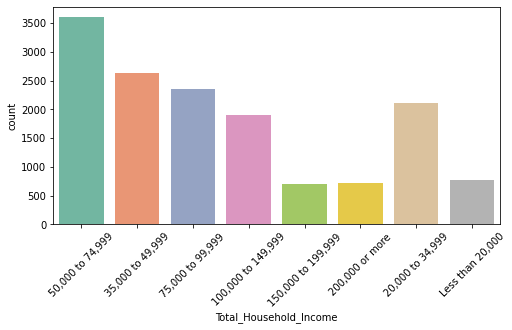

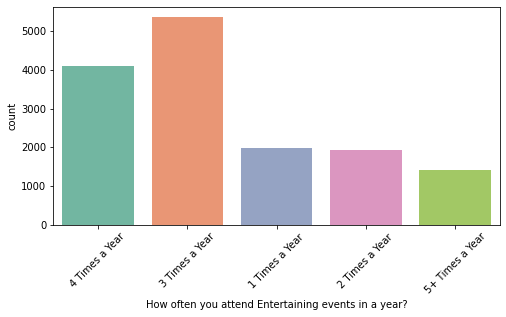

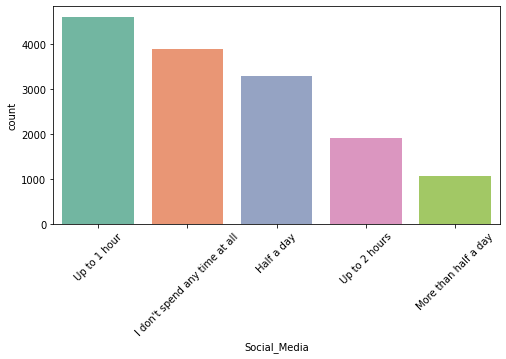

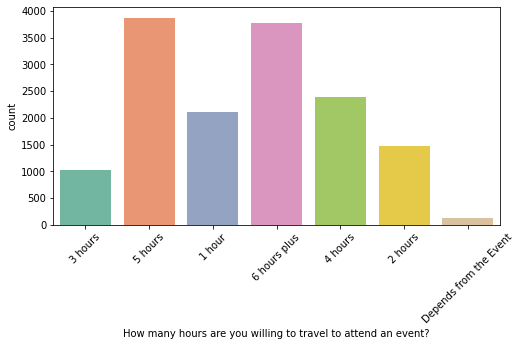

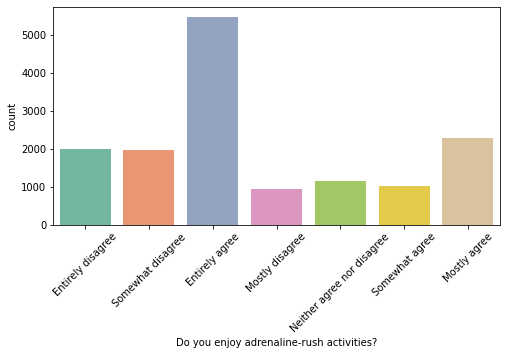

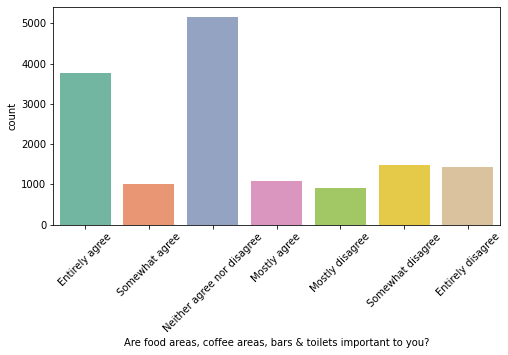

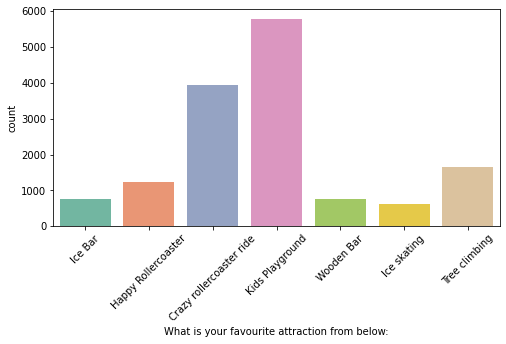

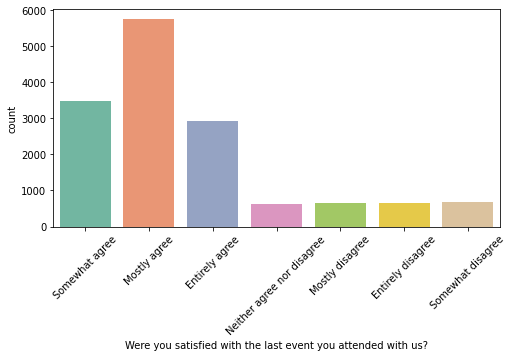

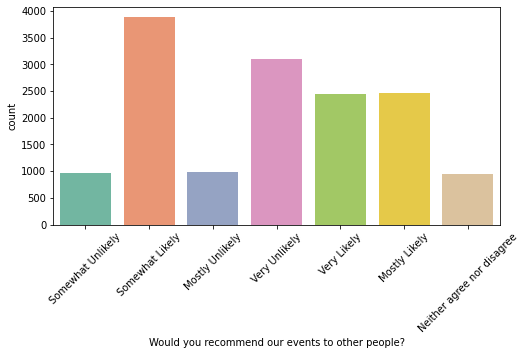

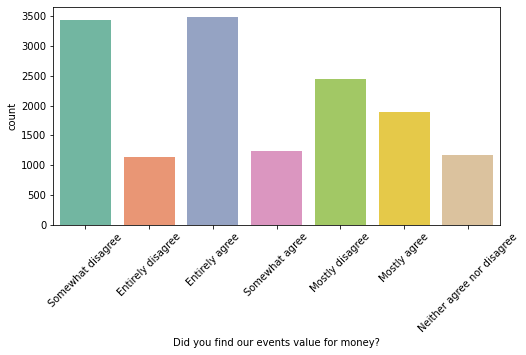

In [96]:
# Plotting countplots for whole features
for column in features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plt.show()

In [101]:
# Creating new dataframe to keep only categorical variables (for transforming it into new dummies features)
new_df = df[features]
new_df.head()

,Age,Gender,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [107]:
# Transforming variables into new dummies features for ML algorithm
new_df = pd.get_dummies(new_df)
print('Data shape is: {} rows and {} columns'.format(new_df.shape[0],new_df.shape[1]))
new_df.head()

Data shape is: 14778 rows and 86 columns


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [109]:
# Creating ndarray with values of new_df for training k-means algorithm
X_train = new_df.values
X_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [127]:
#Running K-means algorithm
kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)
print('The example clusters are: {} and inertia is: {}'.format(kmeans.labels_, kmeans.inertia_))

The example clusters are: [3 1 1 ... 3 4 1] and inertia is: 101900.29755349897


In [156]:
# Running Kmeans with multiple k parameter to show inertia results
k_parameter=range(1,21)
inertia=[]
for k in k_parameter:
    kmeans = KMeans(n_clusters=k, random_state=540)
    kmeans = kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    print('For cluster {} inertia is : {}'.format(k, kmeans.inertia_ ))

For cluster 1 inertia is : 144656.15374204854
For cluster 2 inertia is : 125619.02972065716
For cluster 3 inertia is : 114905.3868426669
For cluster 4 inertia is : 106337.17594801626
For cluster 5 inertia is : 101900.29755349897
For cluster 6 inertia is : 96432.61527743546
For cluster 7 inertia is : 93814.49897631705
For cluster 8 inertia is : 91696.54993720855
For cluster 9 inertia is : 89725.3562418471
For cluster 10 inertia is : 88540.72201828392
For cluster 11 inertia is : 87713.44100481921
For cluster 12 inertia is : 86736.43131820268
For cluster 13 inertia is : 85776.72764298259
For cluster 14 inertia is : 84956.59165115483
For cluster 15 inertia is : 84206.77799053381
For cluster 16 inertia is : 83616.4740432436
For cluster 17 inertia is : 83077.97101802094
For cluster 18 inertia is : 82566.75103629948
For cluster 19 inertia is : 81813.49217652805
For cluster 20 inertia is : 81426.55478698439


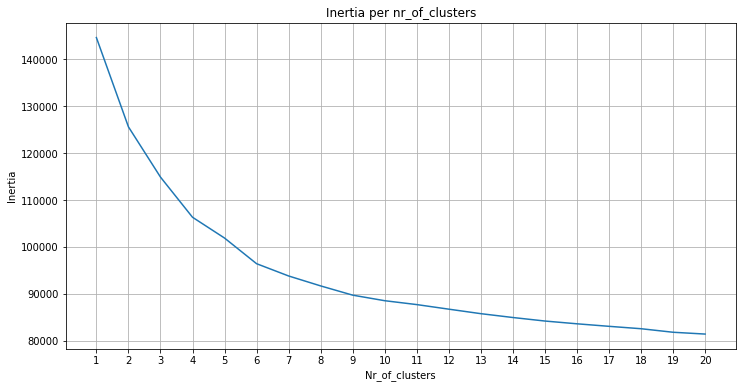

In [165]:
# Plotting inertia results for choosing optimal cluster numbers by elbow method
plt.figure(figsize=(12,6))
plt.grid()
nr_of_clusters = np.arange(1, len(k_parameter)+1)
plt.plot(nr_of_clusters,inertia)
plt.xticks(nr_of_clusters)
plt.xlabel('Nr_of_clusters')
plt.ylabel('Inertia')
plt.title('Inertia per nr_of_clusters')
plt.show()

In [170]:
# I choose from the plot above 6 clusters as optimal,run Kmeans again and save the cluster nr as predicted by algorithm
kmeans = KMeans(n_clusters=6, random_state=2)
kmeans = kmeans.fit(X_train)
clusters = kmeans.predict(X_train)
clusters

array([2, 5, 5, ..., 2, 0, 5])

In [202]:
# Creating DataFrame with volumes in particular cluster
cluster_nr, counts = np.unique(clusters, return_counts=True)
counts_per_cluster = pd.DataFrame(counts).T
counts_per_cluster.columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']
counts_per_cluster.index=['Nr']
counts_per_cluster

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Nr,2178,1224,4460,1863,984,4069


In [220]:
# PCA Analysis with all components
nr_of_components = X_train.shape[1]
pca1 = PCA(n_components=nr_of_components, random_state=453)
pca = pca1.fit(X_train).transform(X_train)

In [227]:
# Calculating total variance and 95% variance
total_variance = sum(pca1.explained_variance_)
print('Total variance is:', total_variance)
var95 = 0.95 * total_variance
print('95% variance is:', var95)

Total variance is: 9.789277508428581
95% variance is: 9.299813633007151


In [252]:
# Creating DataFrame with PCA components and it's expained variance
a = zip(range(1,nr_of_components+1), pca1.explained_variance_)
a = pd.DataFrame(a)
a.columns=['PCA_component', 'Explained_variance']
a['Explained_variance_cumsum']=a['Explained_variance'].cumsum()
a

,PCA_component,Explained_variance,Explained_variance_cumsum
0,1,1.638291e+00,1.638291
1,2,7.652969e-01,2.403588
2,3,5.706584e-01,2.974246
3,4,4.171474e-01,3.391394
4,5,3.961413e-01,3.787535
...,...,...,...
81,82,3.743400e-31,9.789278
82,83,3.133384e-31,9.789278
83,84,2.033996e-31,9.789278
84,85,1.711095e-31,9.789278


In [280]:
# Selecting first nr of PCA_components which are higher than 95% of variance. 53 components fulfill this condition as first.
a[a['Explained_variance_cumsum'] > var95].reset_index().iloc[[0], 1:]

,PCA_component,Explained_variance,Explained_variance_cumsum
0,53,0.046484,9.301802


In [281]:
# PCA Analysis with all components
pca1 = PCA(n_components=53, random_state=453)
pca = pca1.fit(X_train).transform(X_train)

In [282]:
# Running Kmeans with multiple k parameter to show inertia results after PCA 
k_parameter=range(1,21)
inertia=[]
for k in k_parameter:
    kmeans = KMeans(n_clusters=k, random_state=540)
    kmeans = kmeans.fit(pca)
    inertia.append(kmeans.inertia_)
    print('For cluster {} inertia is : {}'.format(k, kmeans.inertia_ ))

For cluster 1 inertia is : 137451.62189105683
For cluster 2 inertia is : 118418.00905235036
For cluster 3 inertia is : 107706.73804798823
For cluster 4 inertia is : 99150.90064944845
For cluster 5 inertia is : 93688.36055213561
For cluster 6 inertia is : 89259.98846975302
For cluster 7 inertia is : 87032.32990208772
For cluster 8 inertia is : 84529.33731350013
For cluster 9 inertia is : 82601.66217311681
For cluster 10 inertia is : 81555.94614267252
For cluster 11 inertia is : 80439.16744004053
For cluster 12 inertia is : 79752.5671396032
For cluster 13 inertia is : 78757.15661191987
For cluster 14 inertia is : 78058.49825141055
For cluster 15 inertia is : 77026.60113522323
For cluster 16 inertia is : 76785.28767851985
For cluster 17 inertia is : 76115.82486717684
For cluster 18 inertia is : 75352.18308675928
For cluster 19 inertia is : 74850.19639323582
For cluster 20 inertia is : 74213.19679727496


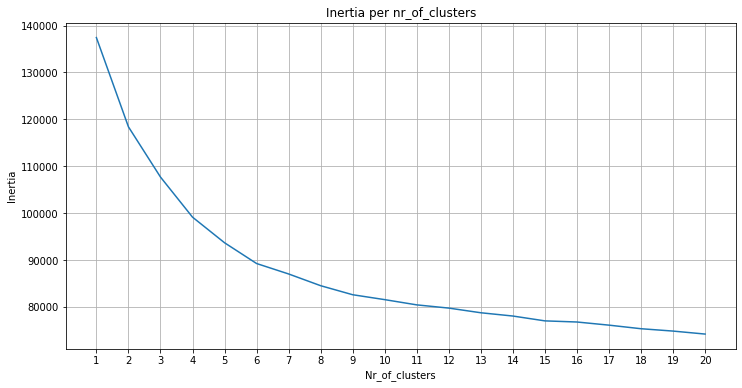

In [283]:
# Plotting inertia results for choosing optimal cluster numbers by elbow method
plt.figure(figsize=(12,6))
plt.grid()
nr_of_clusters = np.arange(1, len(k_parameter)+1)
plt.plot(nr_of_clusters,inertia)
plt.xticks(nr_of_clusters)
plt.xlabel('Nr_of_clusters')
plt.ylabel('Inertia')
plt.title('Inertia per nr_of_clusters')
plt.show()

In [284]:
kmeans = KMeans(n_clusters=6, random_state=2)
kmeans = kmeans.fit(pca)
clusters = kmeans.predict(pca)
clusters

array([1, 5, 5, ..., 1, 3, 5])

In [285]:
# Creating DataFrame with volumes in particular cluster
cluster_nr, counts = np.unique(clusters, return_counts=True)
counts_per_cluster = pd.DataFrame(counts).T
counts_per_cluster.columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']
counts_per_cluster.index=['Nr']
counts_per_cluster

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Nr,984,4448,1225,2179,1863,4079


In [ ]:
# Before PCA, Kmeans algorith inertia for cluster 6 was : 96432.61527743546
# After PCA, Kmeans algorithm inertia for cluster 6 is  : 89259.98846975302
# Conclusion is that I managed to lower result for inertia by applying PCA before Kmeans algorithm
# 6 clusters should be applied for Customer Segmentation Analysis

In [305]:
# Final assigning of particular clusters into initial dataframe (into every customer)
df['Cluster'] = clusters
df['Cluster category']=df['Cluster'].map({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4', 4:'Cluster 5', 5:'Cluster 6'})
df.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Cluster,Cluster category
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,1,Cluster 2
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,5,Cluster 6
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,5,Cluster 6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,4,Cluster 5
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,3,Cluster 4


In [308]:
# Exporting data to a new table in SQL
from sqlalchemy import create_engine
import urllib

quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-53QLEJV\SQLEXPRESS;"
                     "Database=Data_SK;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
df.to_sql('Customer_Clusters', schema='dbo', con = engine, if_exists = 'replace')